INTRODUZIONE TEORICA
-
Il modello di Ekman descrive l'andamento delle correnti marine nella direzione E (est) e N (nord) in funzione della profondità z. Le equazioni sono le seguenti:
$$u(z)=u_g+\frac{\sqrt{2}}{\rho fd}e^{\frac{z}{d}}\left(T_x\cos{\left(\frac{z}{d}-\Phi\right)}-T_y\sin{\left(\frac{z}{d}-\Phi\right)}\right)$$
$$v(z)=v_g+\frac{\sqrt{2}}{\rho fd}e^{\frac{z}{d}}\left(T_x\sin{\left(\frac{z}{d}-\Phi\right)}+T_y\cos{\left(\frac{z}{d}-\Phi\right)}\right)$$
Dove $u_g$ e $v_g$ sono le componenti della corrente per $z \rightarrow \infty$, $\rho=1010 \, kg/m^3$ è la densità dell'acqua marina, $f=2\Omega\sin(\phi)$ è il parametro di Coriolis, che dipende dalla velocità di rotazione della Terra $\Omega=7.2921*10^{−5} \, rad/s$ e dalla latitudine $\phi=45.55 \degree$, $d$ è la profondità dello strato di Ekman, $T_x=\tau\cos\left(\Theta\right)$ e $T_y=\tau\sin\left(\Theta\right)$ sono le componenti dello stress superficiale causato dal vento, con $\Theta$ la direzione del vento ed infine $\Phi$ è l'angolo tra la corrente superficiale e la direzione del vento. 


PREPARAZIONE ED ANALISI DATI
-
L'obiettivo della prima parte del programma è di caricare e preparare i dati per l'analisi. I dati su cui si lavora sono quelli registrati dalla boa oceanografica VIDA tra le 00:00 del 7/01/2024 e le 23:59 del 9/01/2024, per profondità comprese tra i 2 e i 20 metri. Per garantire uniformità alle condizioni analizzate si selezionano i dati entro una deviazione standard dalla media di intensità e direzione del vento.

Il primo passo è quello di importare le librerie necessarie, che sono:
- "pandas", per effettuare il caricamento e la selezione dei dati all'interno di un dataframe;
- "numpy", per avare a disposizione gli array, le operazioni matematiche e le funzioni elementari;
- "matplotlib.pyplot", per graficare dati e/o funzioni.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Il passo successivo è quello di caricare i dati e selezionare quelli che stanno entro una deviazione standard dalla media di intensità e direzione del vento.\
È stata definita una funzione "data_selection(i)". Questa funzione, attraverso il comando "pd.read_excel()" permette di leggere i dati da un file excel e di caricarli su un dataframe.\
La selezione dei dati che sono entro una deviazione standard dalla media di intensità e direzione del vento avviene nelle due righe successive. La condizione è stata imposta sulle colonne "Mean Wind Speed" e "Mean Wind Direction", andando a sfruttare i comandi "DataFrame.mean()" e "DataFrame.std()" che calcolano rispettivamente la media e la deviazione standard sulla colonna.\
Successivamente, è stato creato "data", ovvero un dataframe inizializzato con i dati registrati alla profondità di 2 metri. Utilizzando un ciclo for ed il comando "pd.merge()" sono state attaccate a destra ed in modo ordinato le colonne riguardanti le correnti nella direzione E ed N ad una certa profondità. In questo modo, si è riusciti a creare un unico dataframe che contiene tutti i dati da analizzare.\
Infine, è stata calcolata la media della direzione del vento utilizzando il comando "DataFrame.mean()" sulla colonna "Mean Wind Direction".

In [2]:
def data_selection(i): 
    data_start=pd.read_excel("height_{}.xlsx".format(i))
    data=data_start[(data_start["Mean Wind Speed"]>=data_start["Mean Wind Speed"].mean()-data_start["Mean Wind Speed"].std())&(data_start["Mean Wind Speed"]<=data_start["Mean Wind Speed"].mean()+data_start["Mean Wind Speed"].std())]
    return data[(data["Mean Wind Direction"]>=data_start["Mean Wind Direction"].mean()-data_start["Mean Wind Direction"].std())&(data["Mean Wind Direction"]<=data_start["Mean Wind Direction"].mean()+data_start["Mean Wind Direction"].std())]
    
data=data_selection(2)
for i in range(3,21):
    data=pd.merge(data,data_selection(i),on=['Date and time','Mean Wind Speed','Waves mean direction','Mean Wind Direction','Waves mean height'])
print(data)

Theta=data["Mean Wind Direction"].mean()*np.pi/180

         Date and time  Mean Wind Speed  Mean Wind Direction  \
0  2024-01-07 00:00:00          13.7669              59.8344   
1  2024-01-07 00:30:00          12.6352              57.1157   
2  2024-01-07 01:00:00          13.8131              52.7333   
3  2024-01-07 01:30:00          14.0673              53.2746   
4  2024-01-07 02:30:00          11.2371              53.3293   
..                 ...              ...                  ...   
64 2024-01-09 16:00:00          14.1761              56.9525   
65 2024-01-09 16:30:00          13.9356              60.5521   
66 2024-01-09 17:00:00          12.5449              58.4656   
67 2024-01-09 17:30:00          12.1905              56.1501   
68 2024-01-09 18:00:00          12.4750              57.5161   

    Waves mean height  Waves mean direction  CurrentE (2 m)  CurrentN (2 m)  \
0               0.961                 44.56            13.6             3.7   
1               0.819                 40.34            15.0             2

La seguente parte del programma ha come obiettivo quello di plottare l'andamento medio delle correnti in direzione E e N in funzione della profondità z e di evidenziare la spirale di Ekman.\
Innanzitutto, sono state create 3 liste vuote, che verranno riempite in modo ordinato con i valori delle profondità, delle correnti medie nella direzione E ed N. Quest'ultime sono state ottenute sempre utilizzando il comando "DataFrame.mean()" sulle colonne di "data". Le 3 liste vuote vengono riempite tramite l'utilizzo di un ciclo for su un indice intero "i" che varia nel range [2,20] ed del comando ".append()", che permette di aggiungere un elemento alla lista. A questo punto è possibile graficare utilizzando il comando "plt.plot()" i grafici dell'andamento medio delle correnti in funzione della profondità.\
Per quanto riguarda il grafico della spirale di Ekman, per prima cosa è stata creata un colormap di 19 colori diversi ed ordinati a partire dalla preesistente "plt.cm.gist_rainbow", che nel codice è stata chiamata "cmap". È stato utilizzato il comando "np.linspace()" per generare 19 valori equidistanziati tra [0,1] e sono stati salvati nell'array "values". Successivamente, è stato creata, valutando "cmap" in "values", una matrice (19,4).\
Per evidenziare la spirale di Ekman, si usa il comando "plt.quiver()" che permette di plottare un vettore fornendogli l'origine e le componenti.




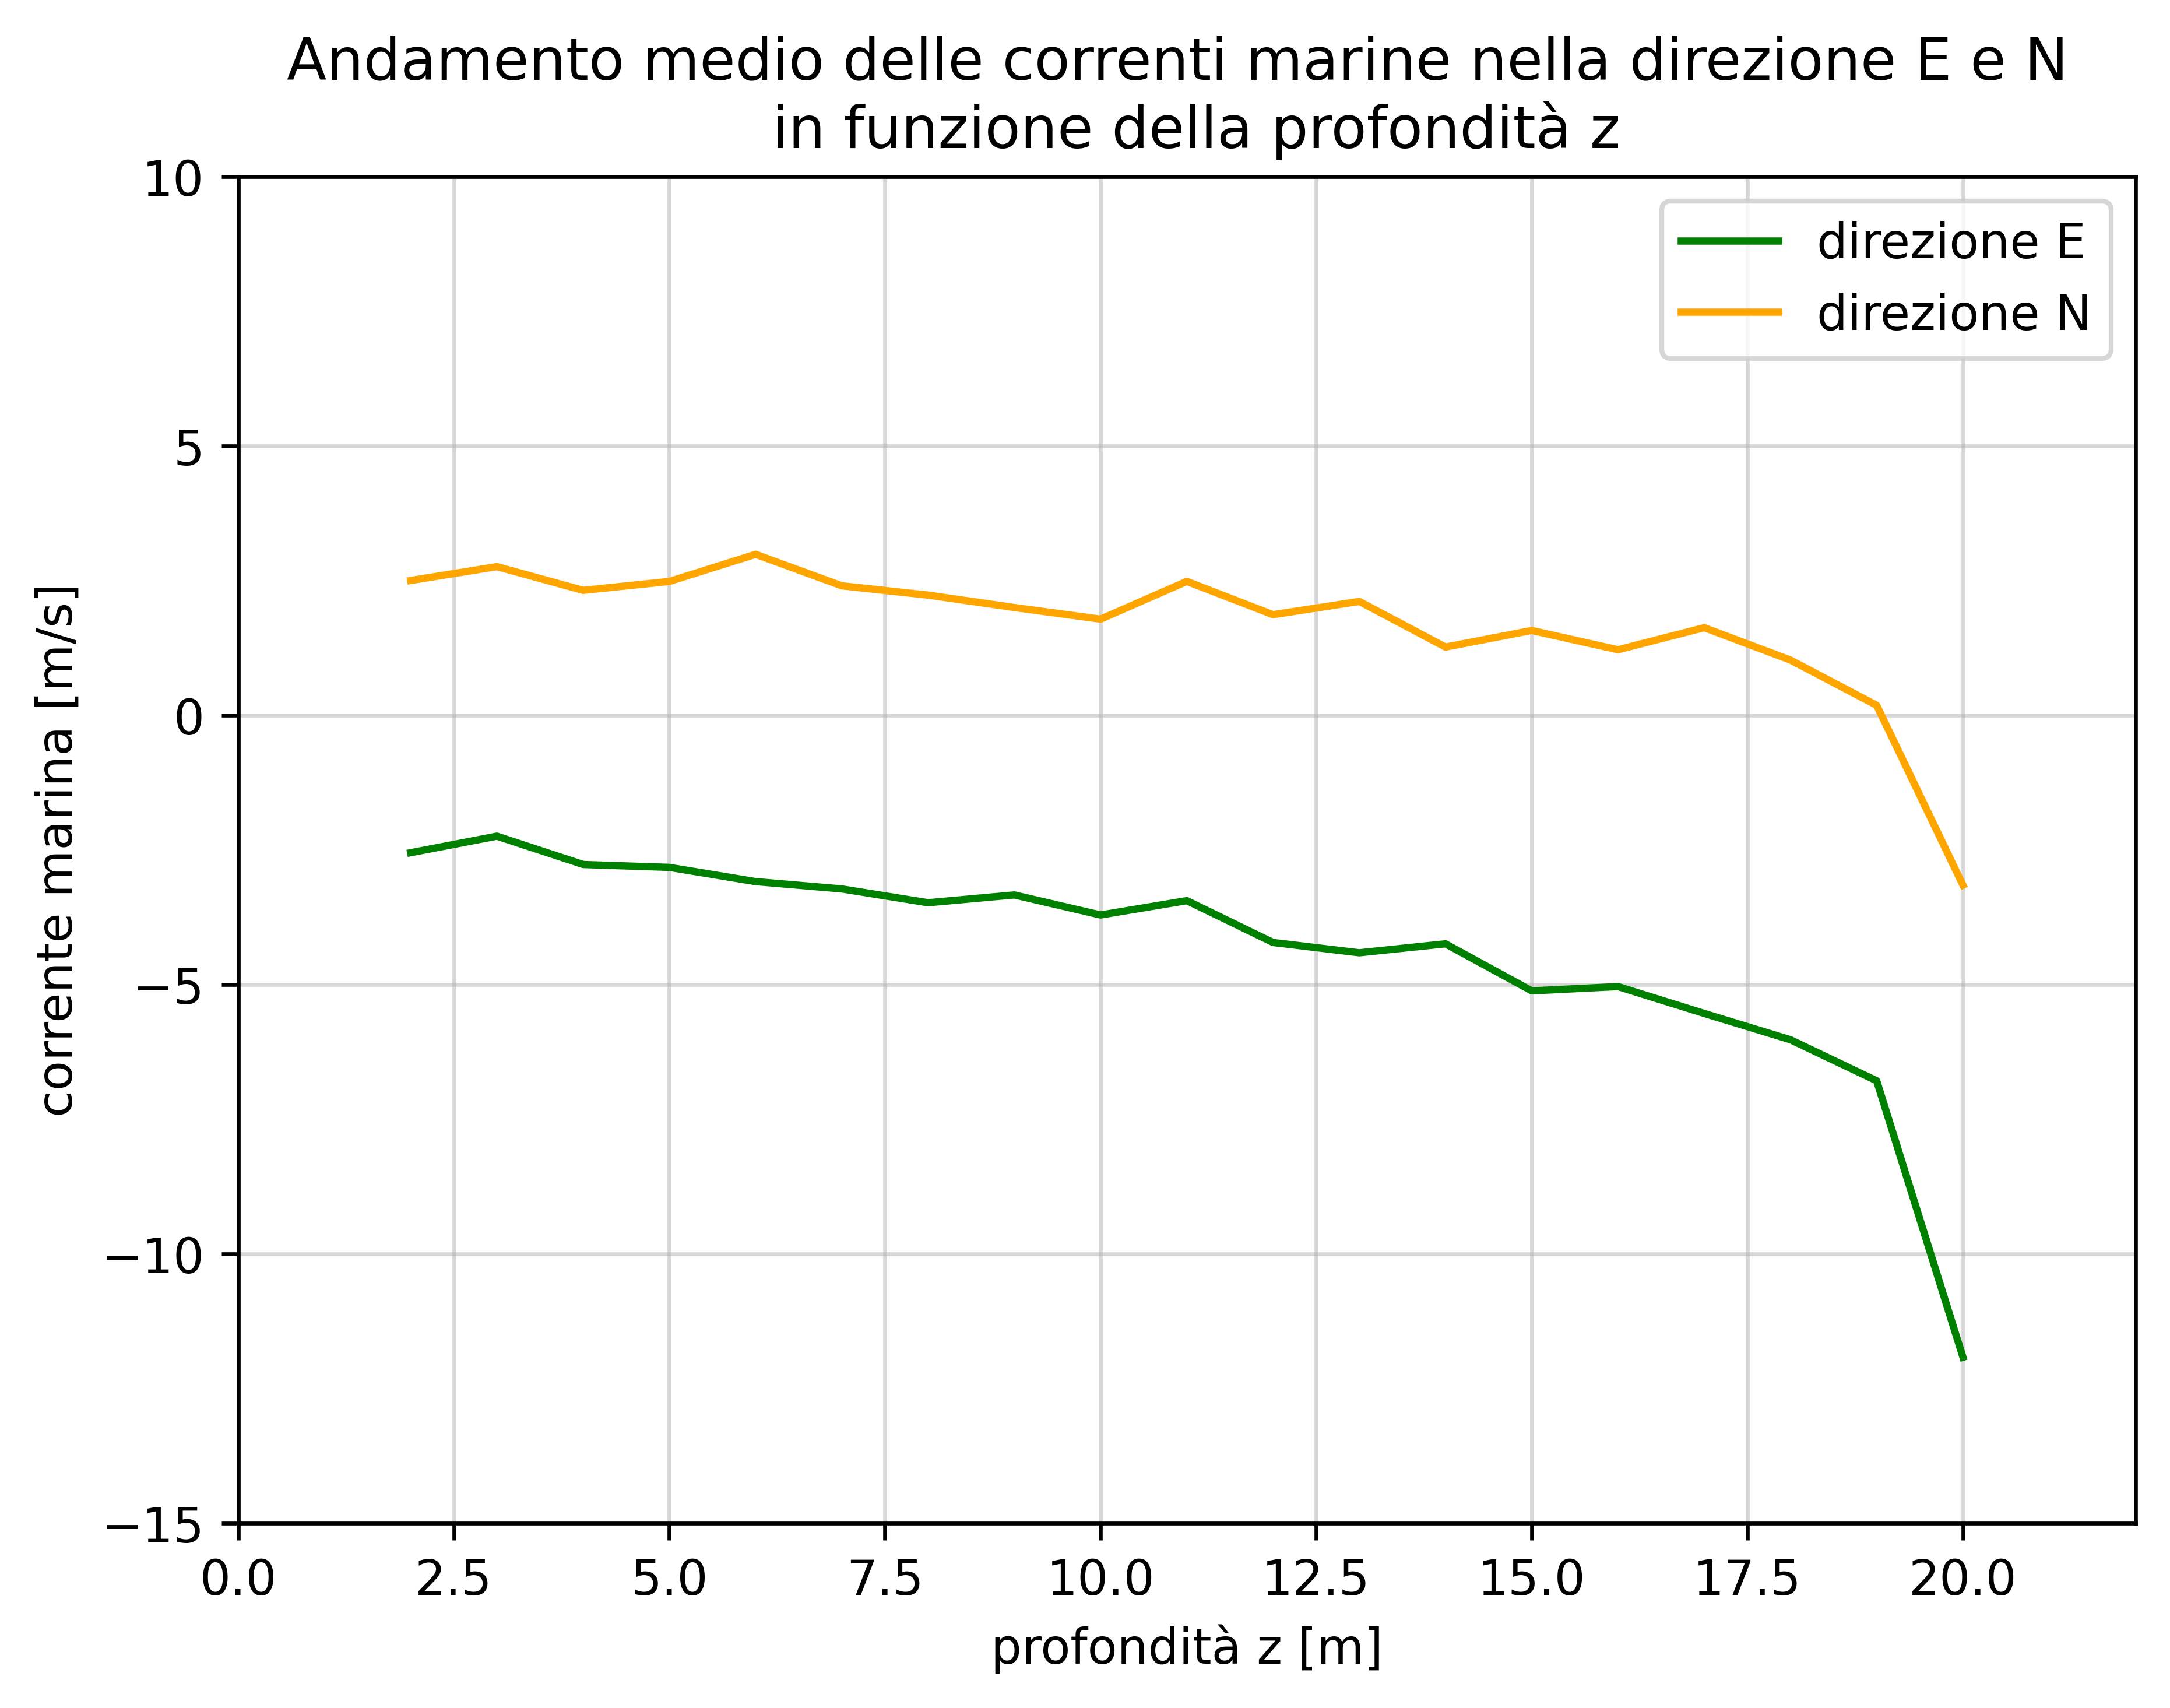

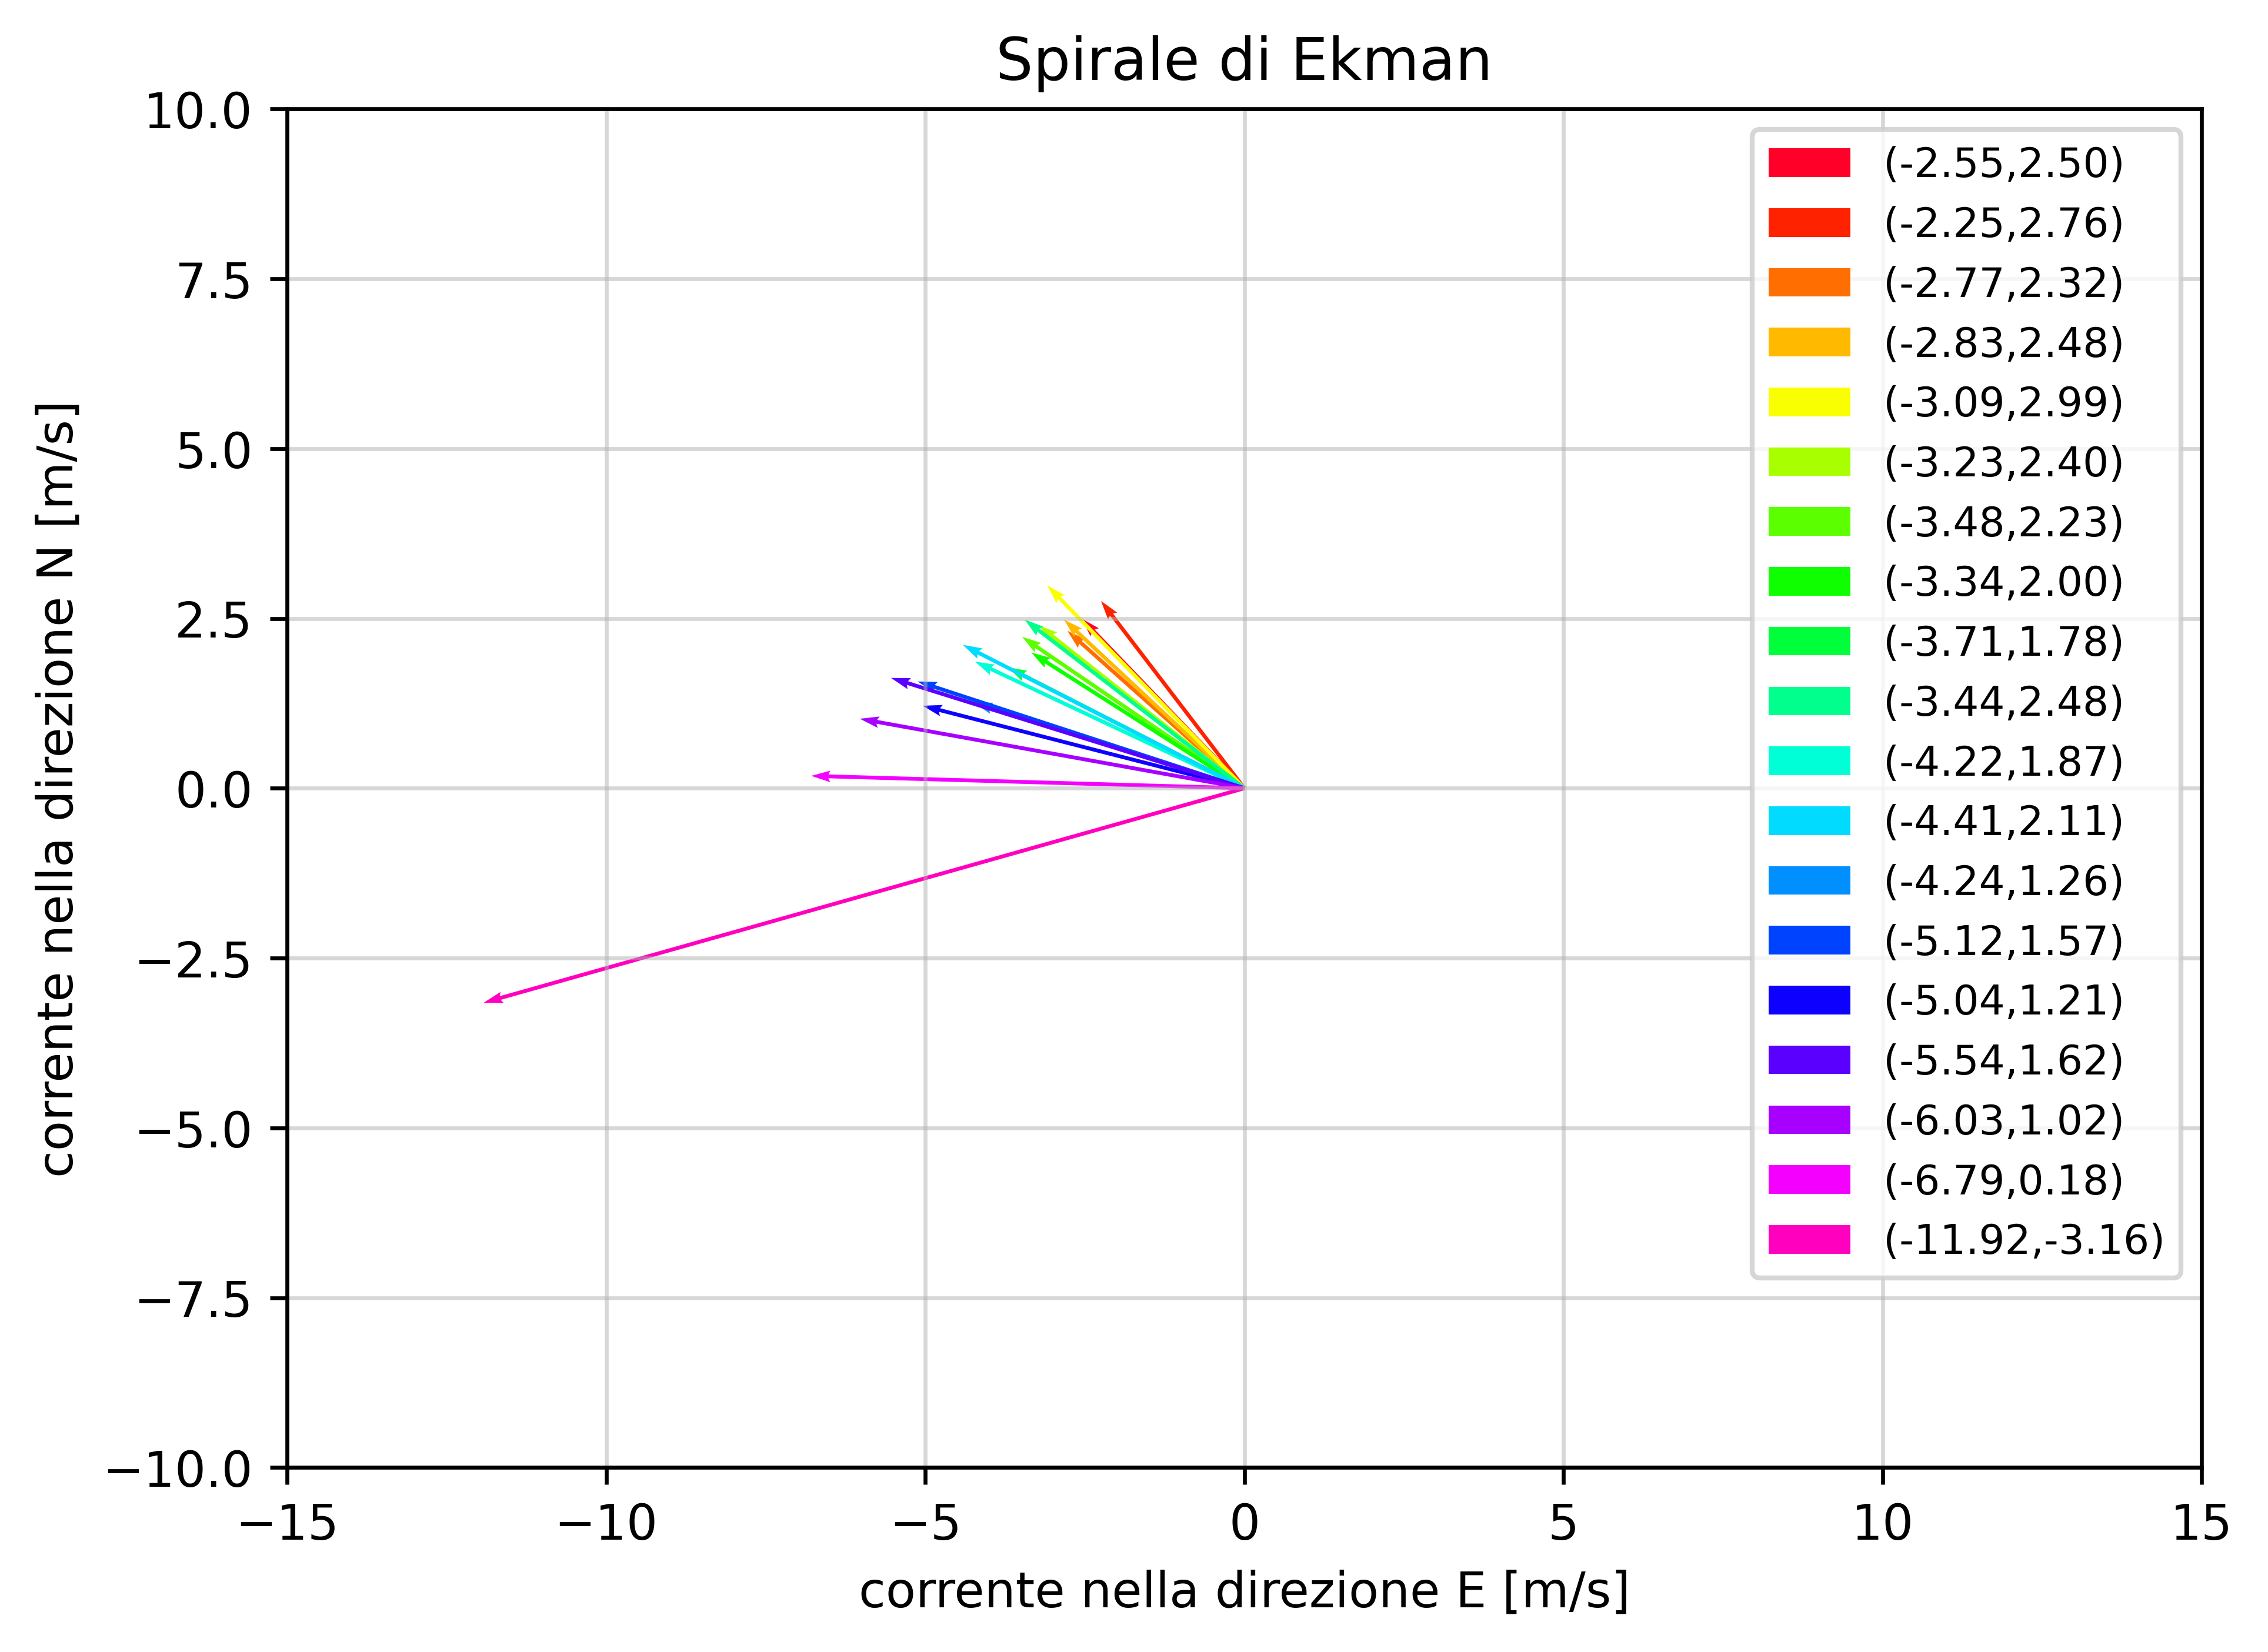

In [3]:
list_z=[]
list_CurrentE=[]
list_CurrentN=[]
for i in range(2,21): #il 21 è escluso per via della sintassi del comando range()
    list_z.append(i)
    list_CurrentE.append(data["CurrentE ({} m)".format(i)].mean())
    list_CurrentN.append(data["CurrentN ({} m)".format(i)].mean())
observed_data=np.array([[list_CurrentE[i],list_CurrentN[i]] for i in range(0,19)])
l=len(observed_data)

plt.figure(figsize=(7,5),dpi=600)
plt.plot(list_z,list_CurrentE,color="green")
plt.plot(list_z,list_CurrentN,color="orange")
plt.xlim(0,22)
plt.ylim(-15,10)
plt.title("Andamento medio delle correnti marine nella direzione E e N \n in funzione della profondità z")
plt.xlabel("profondità z [m]")
plt.ylabel("corrente marina [m/s]")
plt.legend(["direzione E","direzione N"])
plt.grid(alpha=0.5)
plt.show()

cmap=plt.cm.gist_rainbow
n_colors=l
values=np.linspace(0,1,n_colors)
colors=cmap(values)

plt.figure(figsize=(7,5),dpi=600)
legend=[]
for i in range(0,19):
    plt.quiver(0,0,list_CurrentE[i],list_CurrentN[i],color=colors[i],width=0.002,angles='xy',scale_units='xy',scale=1)
    legend.append("({0:.2f},{1:.2f})".format(list_CurrentE[i],list_CurrentN[i]))
plt.xlim([-15,15])
plt.ylim([-10,10])
plt.title("Spirale di Ekman")
plt.xlabel("corrente nella direzione E [m/s]")
plt.ylabel("corrente nella direzione N [m/s]")
plt.legend(legend,fontsize="small")
plt.grid(alpha=0.5)
plt.show()

IMPLEMENTAZIONE DEL MODELLO
-

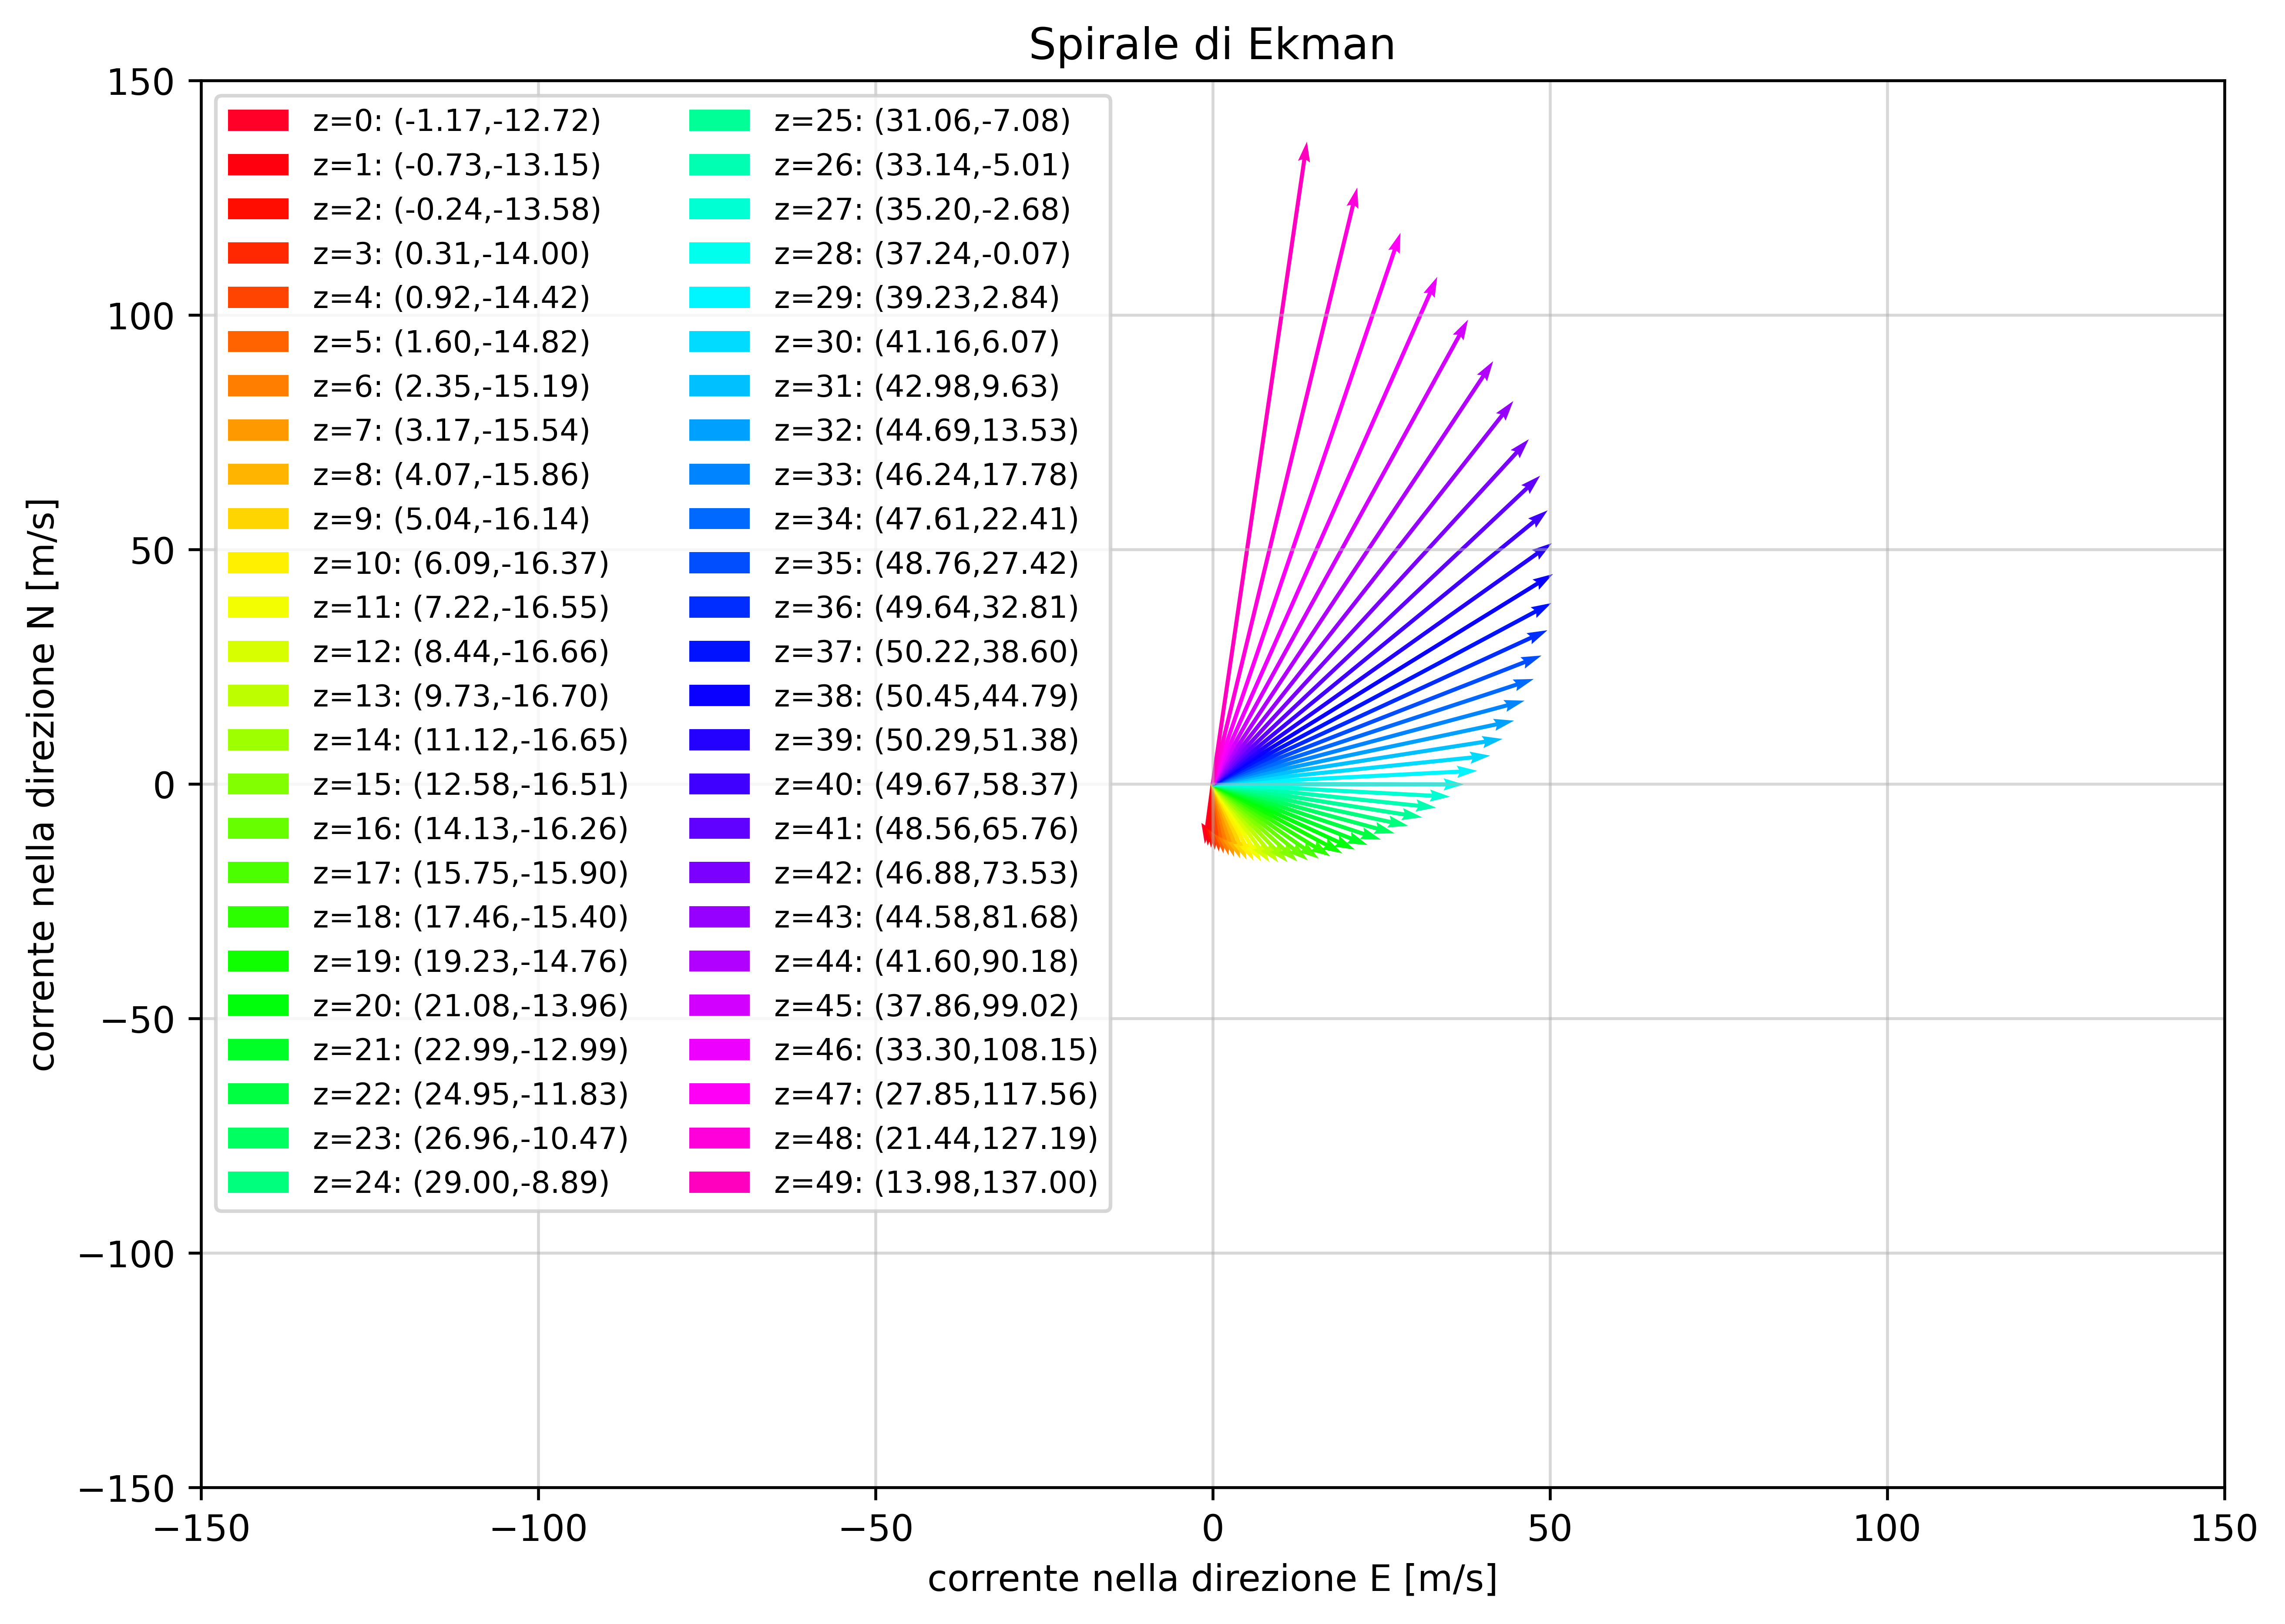

'plt.figure(figsize=(10,7),dpi=600)\nplt.plot(list_z,[lst[0] for lst in list_uv],color="green")\nplt.plot(list_z,[lst[1] for lst in list_uv],color="orange")\nplt.title("Andamento teorico delle correnti marine nella direzione E e N in funzione della profondità z")\nplt.xlabel("profondità z [m]")\nplt.ylabel("corrente marina [m/s]")\nplt.legend(["direzione E","direzione N"])\nplt.grid(alpha=0.5)\nplt.show()'

In [4]:
rho=1010
Omega=7.2921*10**(-5)
f=2*Omega*np.sin(45.55*np.pi/180) #la funzione np.sen() richiede come argomento un angolo in radianti
def uv(z,parameters,rho,f,Theta):
    tau,d,phi,u_g,v_g=parameters
    T_x=tau*np.cos(Theta)
    T_y=tau*np.sin(Theta)
    u=u_g+np.sqrt(2)/(rho*f*d)*np.exp(z/d)*(T_x*np.cos(z/d-phi)-T_y*np.sin(z/d-phi))
    v=v_g+np.sqrt(2)/(rho*f*d)*np.exp(z/d)*(T_x*np.sin(z/d-phi)+T_y*np.cos(z/d-phi))
    return [u,v]

list_z=[]
list_uv=[]
for i in range(0,50):
    z=i
    list_z.append(z)
    list_uv.append(uv(i,(-8,16,-0.55,-1,-6),rho,f,Theta)) 

n_colors=50
values=np.linspace(0,1,n_colors)
colors=cmap(values)

plt.figure(figsize=(10,7),dpi=600)
legend=[]
for i in range(0,50):
    plt.quiver(0,0,list_uv[i][0],list_uv[i][1],color=colors[i],width=0.002,angles='xy',scale_units='xy',scale=1)
    legend.append("z={0}: ({1:.2f},{2:.2f})".format(i,list_uv[i][0],list_uv[i][1]))
plt.xlim([-150,150])
plt.ylim([-150,150])
plt.title("Spirale di Ekman")
plt.xlabel("corrente nella direzione E [m/s]")
plt.ylabel("corrente nella direzione N [m/s]")
plt.legend(legend,fontsize="small",ncol=2,loc="upper left")
plt.grid(alpha=0.5)
plt.show()

'''plt.figure(figsize=(10,7),dpi=600)
plt.plot(list_z,[lst[0] for lst in list_uv],color="green")
plt.plot(list_z,[lst[1] for lst in list_uv],color="orange")
plt.title("Andamento teorico delle correnti marine nella direzione E e N in funzione della profondità z")
plt.xlabel("profondità z [m]")
plt.ylabel("corrente marina [m/s]")
plt.legend(["direzione E","direzione N"])
plt.grid(alpha=0.5)
plt.show()'''

FIT ED EMCEE
-
In questa sezione, il cui scopo è quello di trovare la stima dei parametri migliore e di ricavare informazioni sulle funzioni di distribuzione dei parametri, si devono importare i seguenti pacchetti:
- "emcee", per effettuare un campionamento della ln-posterior basato sulle Markov Chains;
- "scipy.optimize.minimaze", per ricavare la miglior stima dei parametri;
- "pygtc", per plottare il grafico triangolare.

Osservando l'equazione di Bayes, sono state definite 3 funzioni. La prima è la "ln_prior", ovvero il logaritmo naturale della prior distribution, che deve tenere conto di cosa sappiamo a priori dei parametri. In questo caso, è stata utilizzata come prior la funzione di distribuzione uniforme, ponendo dei vincoli sul parametro $d$ e $\phi$. Infatti, $d$ rappresenta una profondità e quindi deve essere maggiore di zero, mentre $\phi$ rappresenta l'angolo compreso tra la direzione del vento e quella della corrente superficiale e quindi deve essere compreso nell'intervallo (-$\pi$,$\pi$].\
Successivamente, è stata definita la funzione "ln_Likelihood", ovvero il logaritmo naturale della Likelihood:
$$\ln{\mathcal{L}}=\ln{\left(\prod_{1=1}^N\frac{1}{\sqrt{2\pi}\sigma_i}e^{-\frac{(x_i-\mu_i)^2}{\sigma_i^2}}\right)}=-\frac{N\ln{(2\pi)+\ln{(\det{V})}}}{2}-\frac{(\overrightarrow{x}-\overrightarrow{\mu})^T \cdot V^{-1} \cdot (\overrightarrow{x}-\overrightarrow{\mu})}{2}$$
dove $\overrightarrow{x}=(x_1,...,x_N)$ è il vettore che ha al suo interno le misure del campione, mentre $\overrightarrow{\mu}=(\mu_1,...,\mu_N)$ contiene i valori attesi dal modello. $V$ è la matrice delle covarianze, che in questo caso è una matrice diagonale con valori le varianze associate alle correnti osservate.\
Infine, è stata definita la "ln_posterior", che non è altro che la somma della precedenti.

In [5]:
import emcee
def ln_prior(parameters):
    tau,d,phi,u_g,v_g=parameters
    if d>0 and -np.pi<=phi<=np.pi:
        return 0.0 
    return -np.inf
def ln_Likelihood(parameters,data,matrix_of_covariance,rho,f,Theta):
    tau,d,phi,u_g,v_g=parameters
    model=np.array([uv(i,parameters,rho,f,Theta) for i in range(2,21)])
    N,_=matrix_of_covariance.shape
    constant=-0.5*(N*np.log(2*np.pi)+np.log(np.linalg.det(matrix_of_covariance)))
    residuals=(data-model).T
    exponent=-0.5*np.sum(residuals@np.linalg.inv(matrix_of_covariance)*residuals)
    return np.nansum(constant+exponent)
def ln_posterior(parameters,data,matrix_of_covariance,rho,f,Theta):
    lp=ln_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp+ln_Likelihood(parameters,data,matrix_of_covariance,rho,f,Theta)

matrix_of_covariance=np.zeros((l,l))
for i in range(0,l):
    matrix_of_covariance[i,i]=np.sqrt(0.5**2) #la varianza è il quadrato della deviazione standard

Nella seguente parte del codice, si stima il valore dei parametri $\tau,d,\phi,u_g,v_g$, utilizzando "minimaze()". I risultati sono stati salvati su un array chiamato "best_fit".

In [6]:
from scipy.optimize import minimize
np.random.seed(42)
nll=lambda *args: -ln_posterior(*args) #in questo modo abbiamo un minimo
initial=np.array([0.5,6.0,0.5,-2.5,1.0])*(1+0.1*np.random.randn(5))
soln=minimize(nll,initial,args=(observed_data,matrix_of_covariance,rho,f,Theta))
tau,d,phi,u_g,v_g=soln.x
best_fit=soln.x
print("La miglior stima dei parametri tau, d, phi, u_g, v_g è: ",best_fit)

C:\Users\Utente\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


La miglior stima dei parametri tau, d, phi, u_g, v_g è:  [ 0.12813306  6.37754195  0.47162919 -2.77247713  1.36038721]


Successivamente, si utilizza emcee per campionare la log-posterior. In particolare, si è scelto di utilizzare 32 walker e di fare 2000 step.

In [7]:
pos=soln.x*(1+1e-6*np.random.randn(32,5))
nwalker,ndim=pos.shape
sampler=emcee.EnsembleSampler(nwalker,ndim,ln_posterior,args=(observed_data,matrix_of_covariance,rho,f,Theta))
sampler.run_mcmc(pos,2000,progress=True)

100%|██████████| 2000/2000 [01:04<00:00, 31.11it/s]


State([[ 1.05992321 11.7833113  -0.71552291 -1.47391258  0.77176451]
 [ 2.09324391 15.387094   -1.03464876 -0.77542674  0.93098225]
 [ 0.69711728 10.13683774 -0.54299689 -1.71615372  1.24712636]
 [ 0.6222705  10.17690502 -0.33829508 -2.29422379  0.65488683]
 [ 1.00806186 11.71404978 -0.79697984 -1.52413437  1.05387287]
 [ 1.03933982 12.07430313 -0.79029001 -2.00308282  0.71471642]
 [ 0.4371175   8.81282561 -0.23429714 -2.31029402  0.89253853]
 [ 1.43619398 13.14155762 -0.85535299 -0.78777908  0.93646979]
 [ 0.13755078  6.62031305  0.33717987 -2.798306    1.33370367]
 [ 0.18344354  6.9148782   0.32838524 -2.68025649  0.98276515]
 [ 0.17912146  6.96808013  0.3317922  -2.92209336  1.07260997]
 [ 0.19310889  7.42823852  0.03276161 -2.70247184  1.6090095 ]
 [ 0.45507992  9.03561196 -0.36540846 -2.18704102  1.15609886]
 [ 1.00984165 11.7224277  -0.69281493 -1.70917069  1.01930111]
 [ 1.58242926 13.89178998 -0.94101626 -1.01107173  0.47879965]
 [ 1.1601427  12.28258055 -0.85884545 -1.2077519 

Infine si graficano gli andamenti dei walker attorno ai massimi di ogni parametro e si genera il grafico triangolare utilizzando il comando "pygtc.plotGTC()".

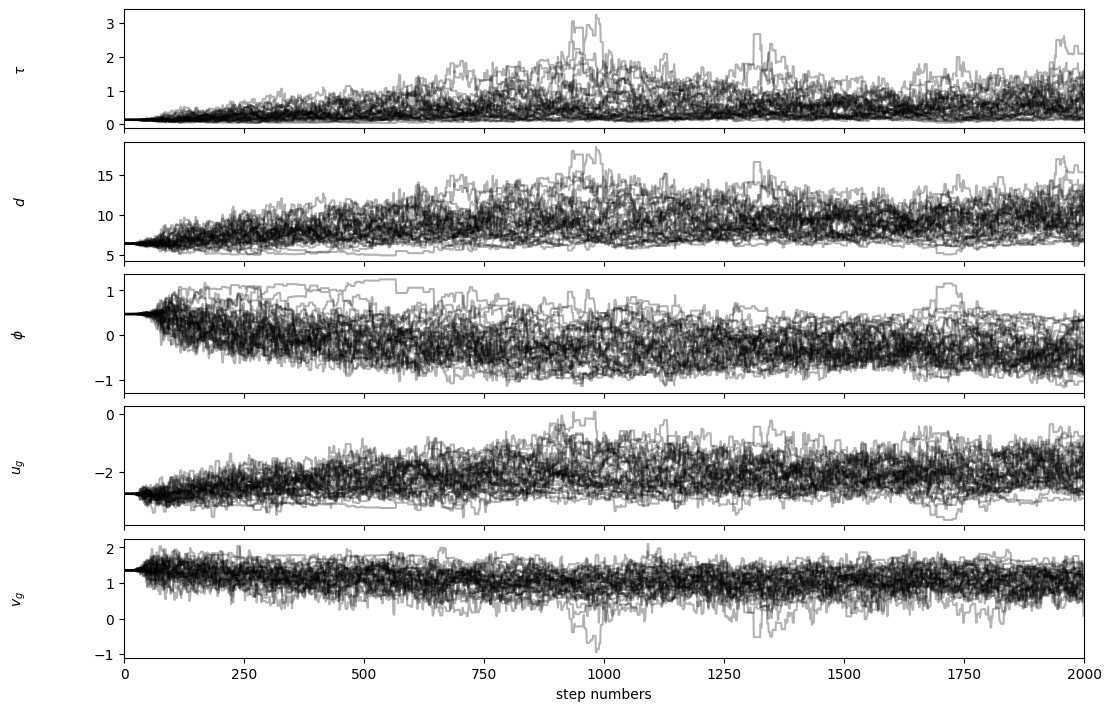

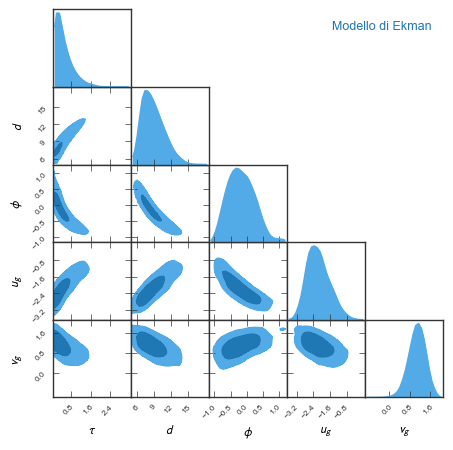

In [8]:
fig,ax=plt.subplots(5,figsize=(11,7),layout='constrained',sharex=True)
samples=sampler.get_chain()
labels=[r'$\tau$','$d$',r'$\phi$','$u_g$','$v_g$']
for k in range(ndim):
    AX=ax[k]
    AX.plot(samples[:,:,k],"k",alpha=0.3)
    AX.set_xlim(0,len(samples))
    AX.set_ylabel(labels[k])
    AX.yaxis.set_label_coords(-0.1, 0.5)
ax[-1].set_xlabel("step numbers");

flat_samples=sampler.get_chain(discard=200,flat=True)

import pygtc
GTC=pygtc.plotGTC(chains=flat_samples,paramNames=[r'$\tau$','$d$',r'$\phi$','$u_g$','$v_g$'],chainLabels="Modello di Ekman",figureSize='MNRAS_page')

CONFRONTO TRA I DATI OSSERVATI ED IL MODELLO DI EKMAN
-

[[-0.02863538  0.86491526]
 [ 0.29032688  1.03498674]
 [-0.20616696  0.49498704]
 [-0.20743704  0.55073917]
 [-0.39071997  0.93817286]
 [-0.41260186  0.23228378]
 [-0.51501238 -0.05838239]
 [-0.17043118 -0.39723834]
 [-0.29240775 -0.70198103]
 [ 0.2798957  -0.05737697]
 [-0.13339588 -0.68606702]
 [ 0.09711407 -0.38466683]
 [ 0.74109872 -1.0918662 ]
 [ 0.39299621 -0.53349803]
 [ 1.03462653 -0.5069457 ]
 [ 1.11508451  0.45012681]
 [ 1.19576559  0.58637034]
 [ 0.95622309  0.70208331]
 [-3.74632361 -1.43664114]]


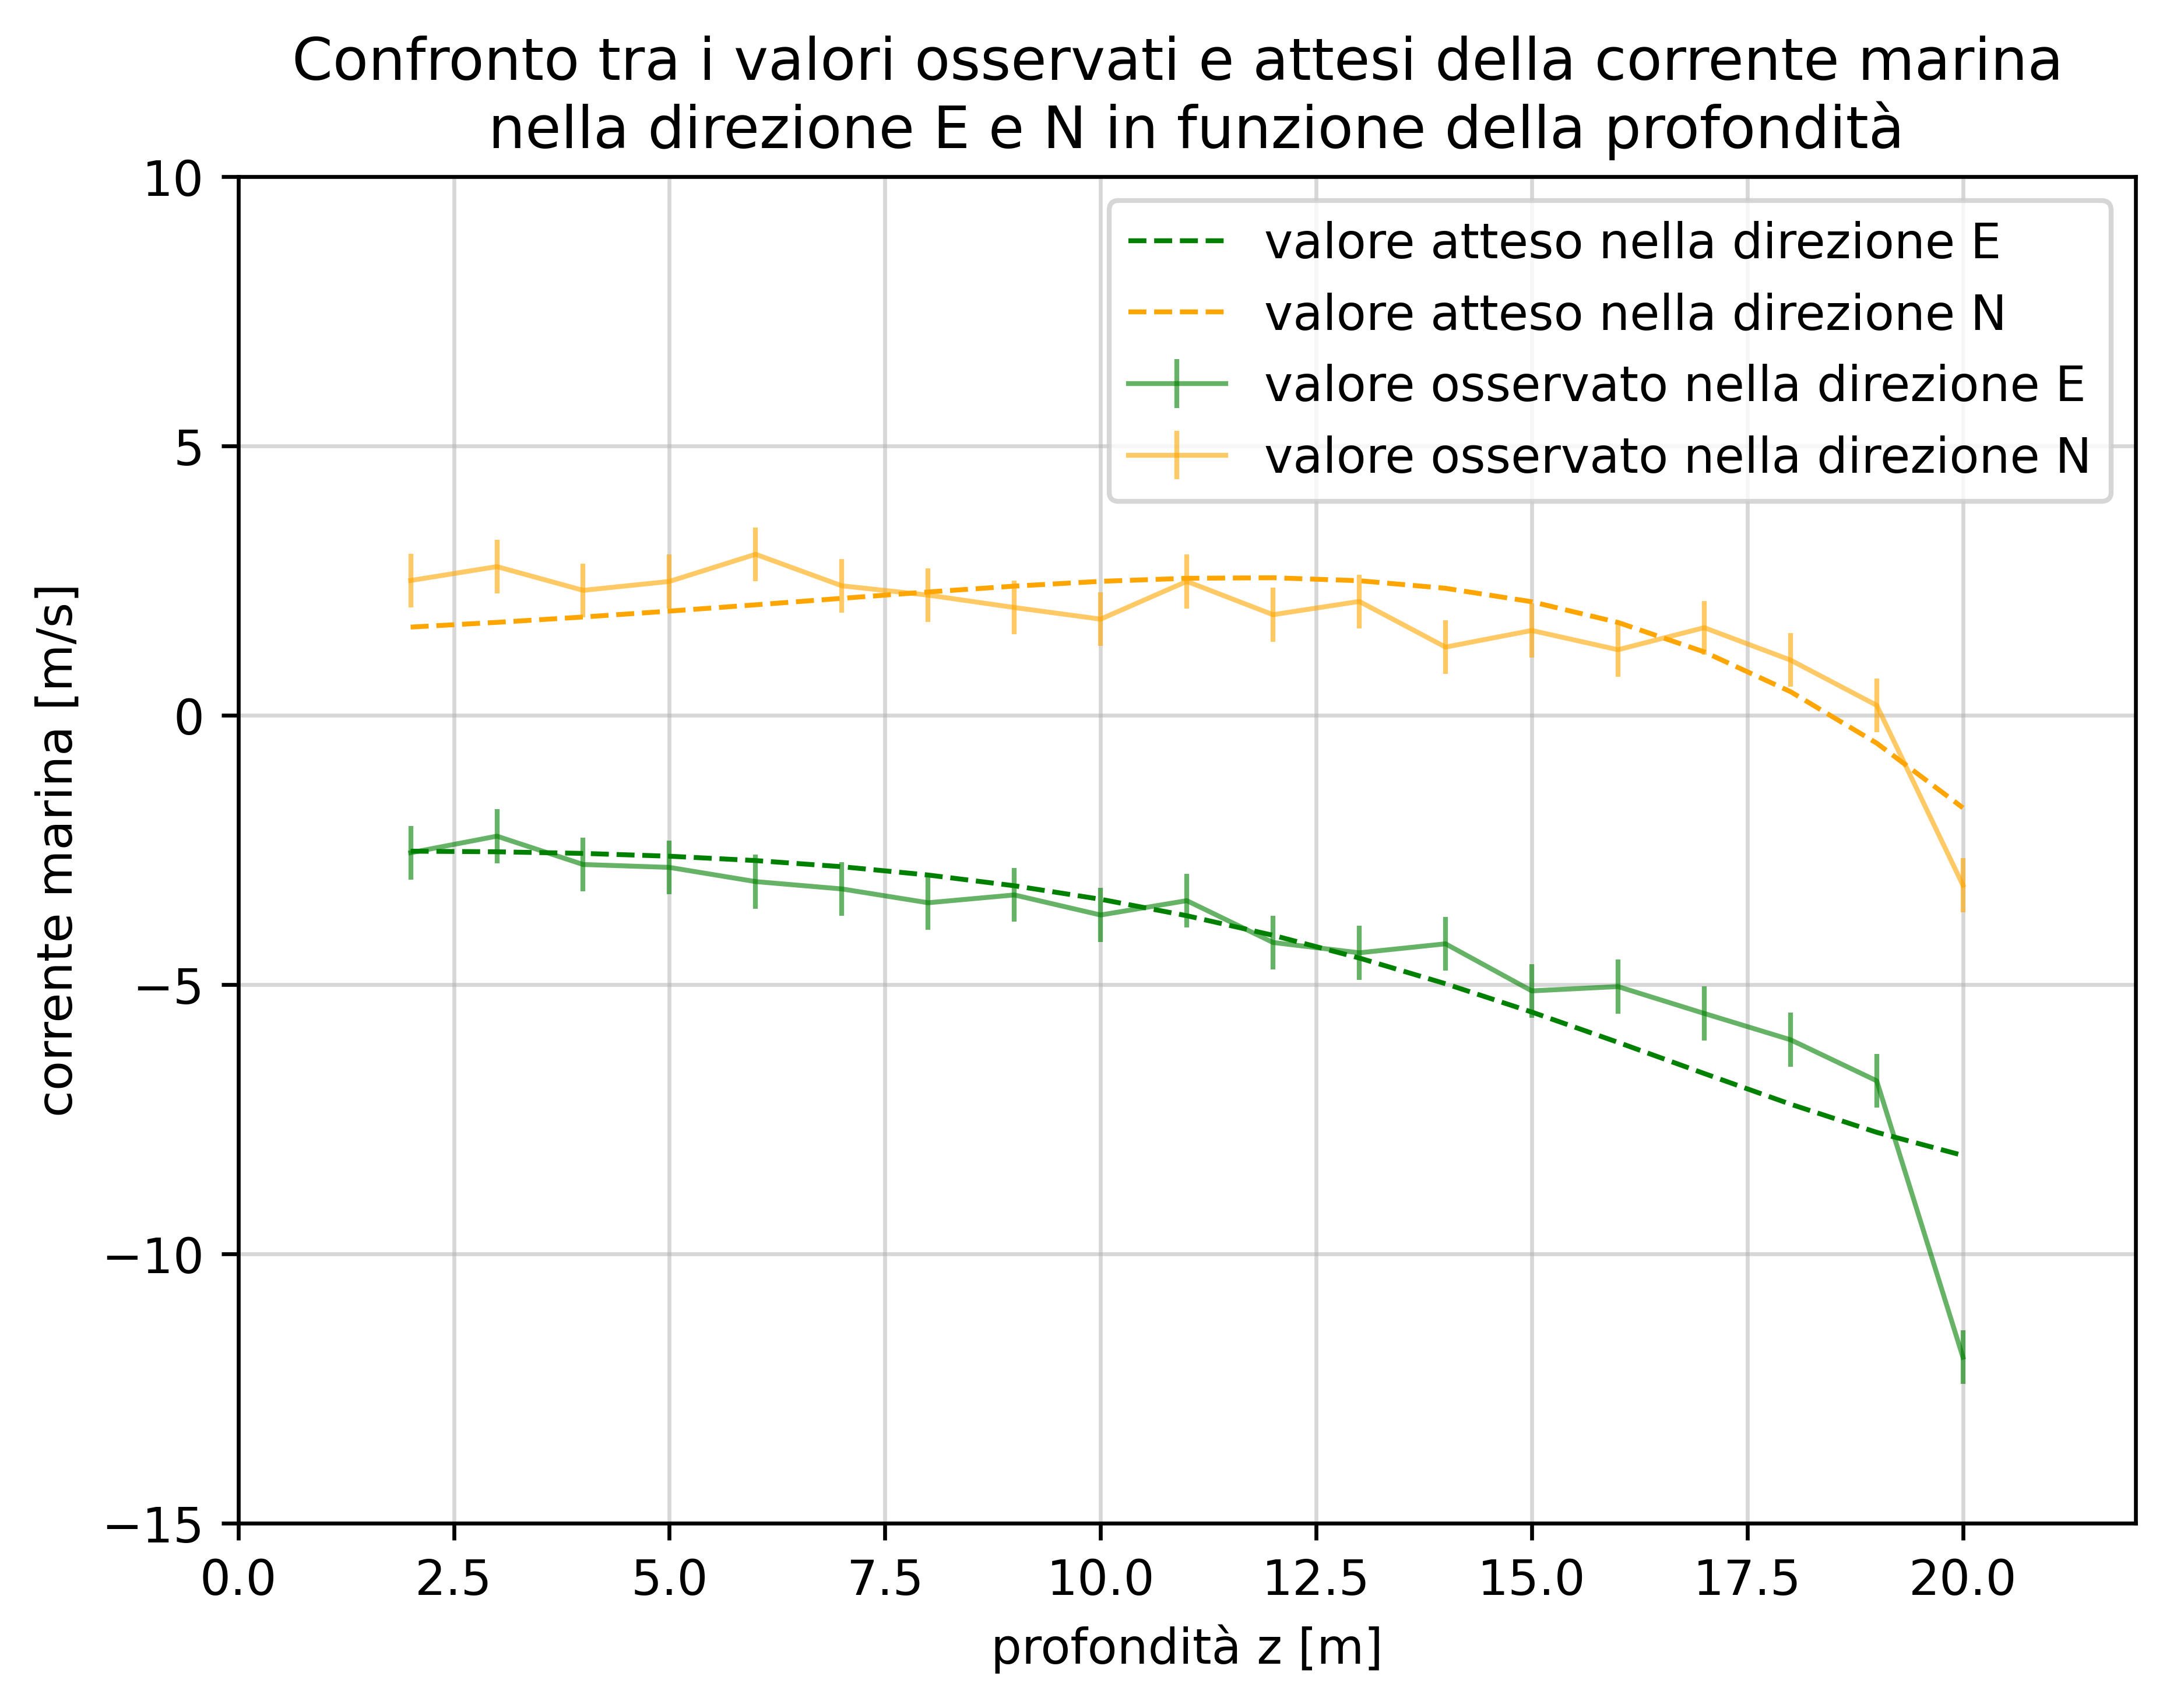

I valori del chi quadro per la corrente in direzione E ed N sono rispettivamente:  40.75119684717938 18.82949517695252


In [9]:
z=np.array([i for i in range(2,21)])
expected_values=np.array([uv(i,best_fit,rho,f,Theta) for i in range(2,21)])
residuals=observed_data-expected_values
print(residuals)

plt.figure(figsize=(7,5),dpi=600)
plt.plot(z,expected_values[:,0],color="green",linestyle="dashed",linewidth=1)
plt.plot(z,expected_values[:,1],color="orange",linestyle="dashed",linewidth=1)
plt.errorbar(z,observed_data[:,0],yerr=0.5,color="green",alpha=0.6,linewidth=1)
plt.errorbar(z,observed_data[:,1],yerr=0.5,color="orange",alpha=0.6,linewidth=1)
plt.xlim(0,22)
plt.ylim(-15,10)
plt.title("Confronto tra i valori osservati e attesi della corrente marina \n nella direzione E e N in funzione della profondità")
plt.xlabel("profondità z [m]")
plt.ylabel("corrente marina [m/s]")
plt.legend(["valore atteso nella direzione E","valore atteso nella direzione N","valore osservato nella direzione E","valore osservato nella direzione N"])
plt.grid(alpha=0.5)
plt.show()

chi_square_u=np.dot(residuals[:,0].T,np.dot(np.linalg.inv(matrix_of_covariance),residuals[:,0]))
chi_square_v=np.dot(residuals[:,1].T,np.dot(np.linalg.inv(matrix_of_covariance),residuals[:,1]))
print("I valori del chi quadro per la corrente in direzione E ed N sono rispettivamente: ",chi_square_u,chi_square_v)

In questa parte del codice, oltre a graficare l'andamento sia osservato che teorico delle correnti marine in direzione E ed N in funzione della profondità, è stato eseguito il test di $\chi^2$. In particolare, fissando il livello di significatività $\alpha=0.5$ e avendo $\nu=19$ gradi di libertà, si ricava che la regione critica è [30.144,$+\infty$]. Si nota che il valore del $\chi^2$ riguardante la corrente in direzione E, cade nella regione critica, e quindi l'ipotesi sarebbe da rigettare. Osservando il grafico del confronto tra le osservazioni e la teoria, si può notare che per $z=20\;m$ i valori osservati si discostano molto dal modello (circa 8 sigma per la direzione E e 3 per quella N). Quindi per migliorare il fit scarterei i valori di corrente per $z=20\;m$.